### 💡 Bonus Part-2: Unlocking Insights 💡

In this part of the project, I dive into a dataset using various data analysis tools to uncover insights and trends. Using Python libraries such as Pandas and Matplotlib, I manipulate and visualize the data to extract valuable information.

I aim to identify patterns and relationships within the data. From there, I conduct further analysis and explore potential explanations for any observed trends.

The insights gained from this analysis can be used to inform decision-making processes and drive business strategies.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [15]:
df = pd.read_csv("C:/Users/ihsankoo/Desktop/Data Preprocessing/use-this-for-bonus-parts")
df0 = df.copy

In [16]:
df.sample(3).T

,8072,11063,8686
make_model,Peugeot 3008,SEAT Ibiza,Peugeot 308
make,Peugeot,SEAT,Peugeot
model,3008,Ibiza,308
price,21050.000,19990.000,23990.000
body_type,Off-Road/Pick-up,Compact,Sedan
type,Used,Used,Used
warranty,Available,No Warranty,Available
mileage,73660.000,16690.000,28420.000
gearbox,Manual,Automatic,Automatic
fuel_type,Diesel,Benzine,Benzine


### 1. What is the`` average`` ``price`` of the vehicles according to their ``body types``?

In [122]:
avg_price = df.groupby(["body_type"]).price.mean()
avg_price

body_type
 Compact             15895.482
 Convertible         20478.867
 Coupe               28712.650
 Off-Road/Pick-up    29436.341
 Sedan               22783.330
 Station wagon       22675.341
Name: price, dtype: float64

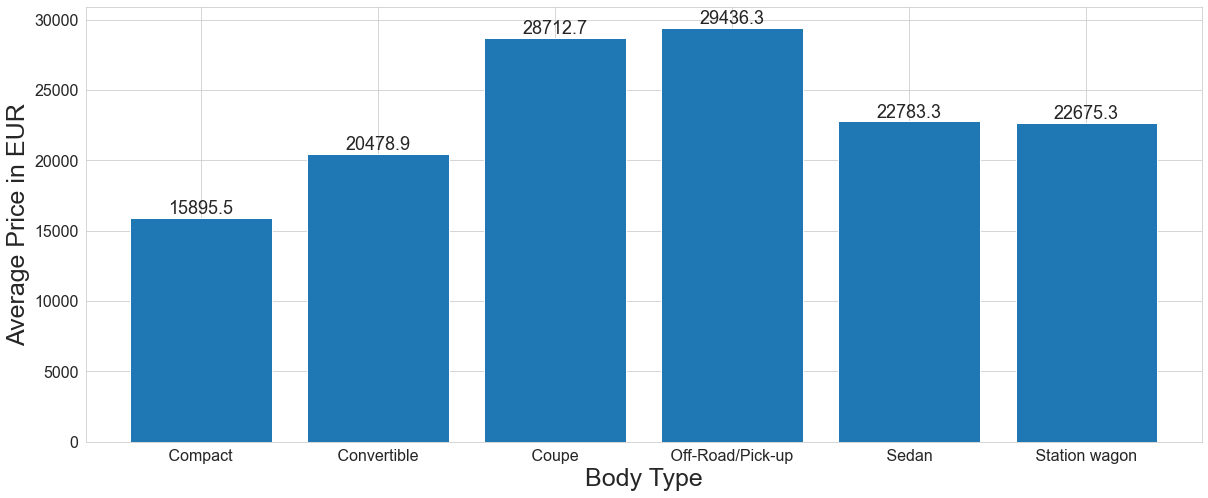

In [124]:
ax = avg_price.plot.bar(figsize=(20, 8), fontsize=16, width=0.8, rot=0)

for text in ax.containers:
    ax.bar_label(text, fontsize=18, rotation=0)

ax.set_xlabel("Body Type", fontsize=25)
ax.set_ylabel("Average Price in EUR", fontsize=25)

plt.show()

### 2. What is the ``average`` ``price`` of the vehicles according to the ``gearbox`` they have?

In [22]:
avg_price_gearbox = df.groupby(["gearbox"]).price.mean()
avg_price_gearbox

gearbox
Automatic        35373.143
Manual           15416.812
Semi-automatic   32610.550
Name: price, dtype: float64

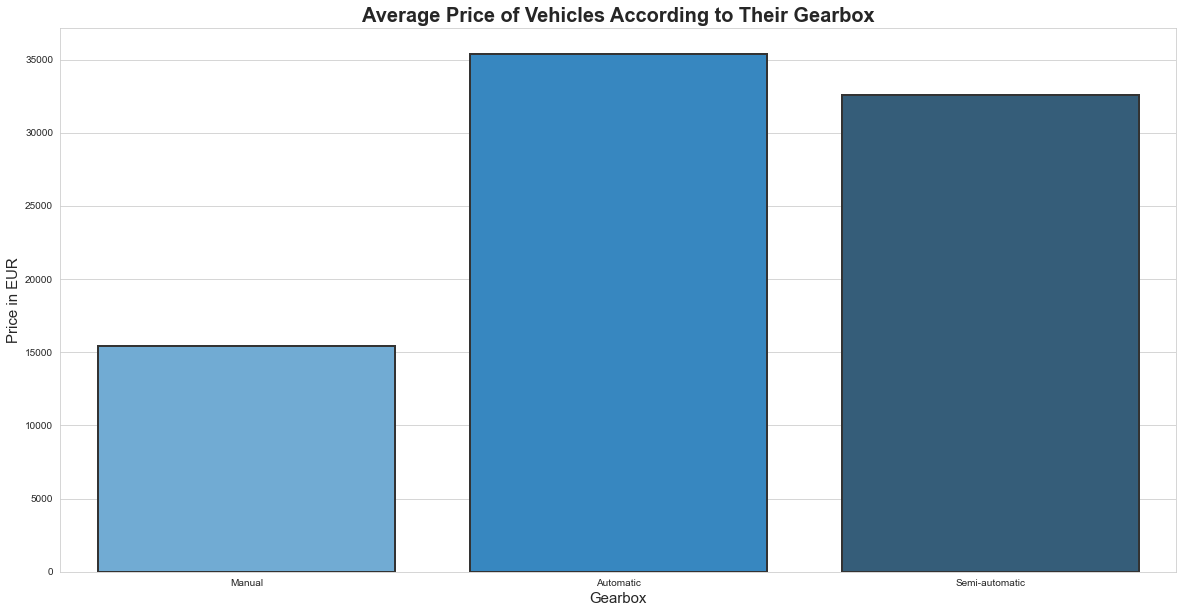

In [40]:
sns.barplot(x=df.gearbox, y=df.price, ci=None, palette="Blues_d", capsize=0.2, errcolor=".2", 
            errwidth=2, linewidth=2, saturation=1, edgecolor=".2")
plt.title("Average Price of Vehicles According to Their Gearbox", fontsize=20, fontweight="bold")
plt.xlabel("Gearbox", fontsize=15)
plt.ylabel("Price in EUR", fontsize=15)
plt.show()

### 3. What is the ``average`` ``price`` of vehicles according to their ``fuel type``?

In [41]:
avg_price_fuel = df.groupby(["fuel_type"]).price.mean()
avg_price_fuel

fuel_type
Benzine              23376.409
Diesel               21119.697
Electric             34696.104
Liquid/Natural Gas   15491.489
Name: price, dtype: float64

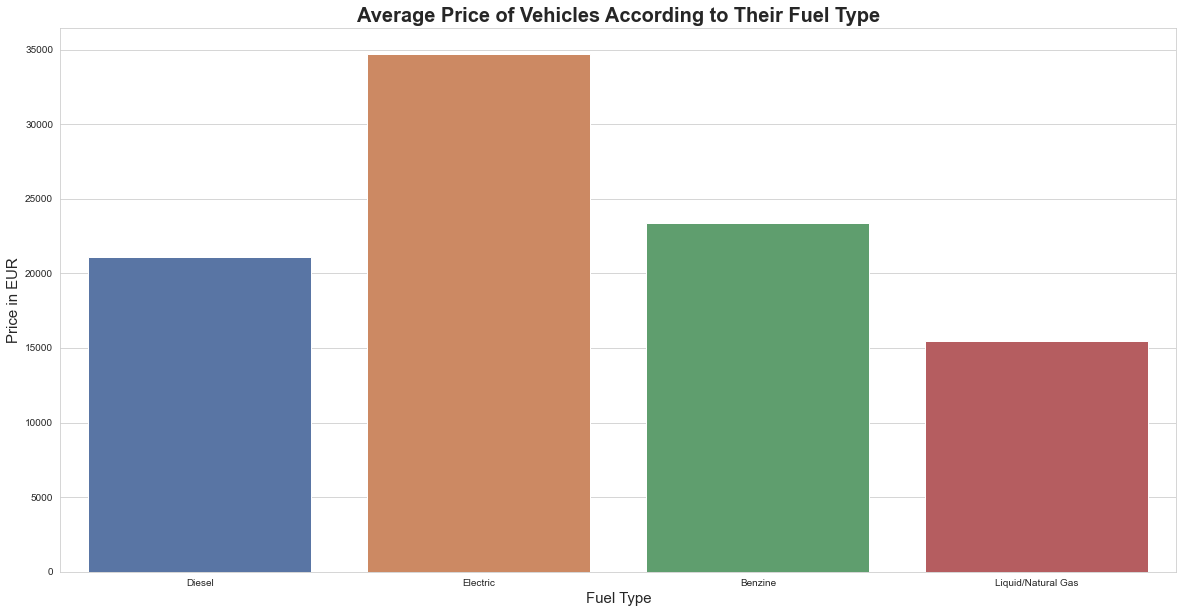

In [52]:

sns.barplot(x=df.fuel_type, y=df.price, palette="deep", ci=None)
plt.title("Average Price of Vehicles According to Their Fuel Type", fontsize=20, fontweight="bold")
plt.xlabel("Fuel Type", fontsize=15)
plt.ylabel("Price in EUR", fontsize=15)
plt.show()


### 4. What is the ``average`` ``price`` of vehicles according to their ``make``?

In [54]:

avg_price_make = df.groupby(["make"]).price.mean()
avg_price_make

make
Dacia           13610.919
Fiat            15362.327
Ford            31202.267
Hyundai         19654.097
Mercedes-Benz   51524.133
Nissan          22019.661
Opel            17054.146
Peugeot         16498.410
Renault         16802.523
SEAT            19200.566
Skoda           23660.575
Toyota          22428.350
Volvo           27155.333
Name: price, dtype: float64

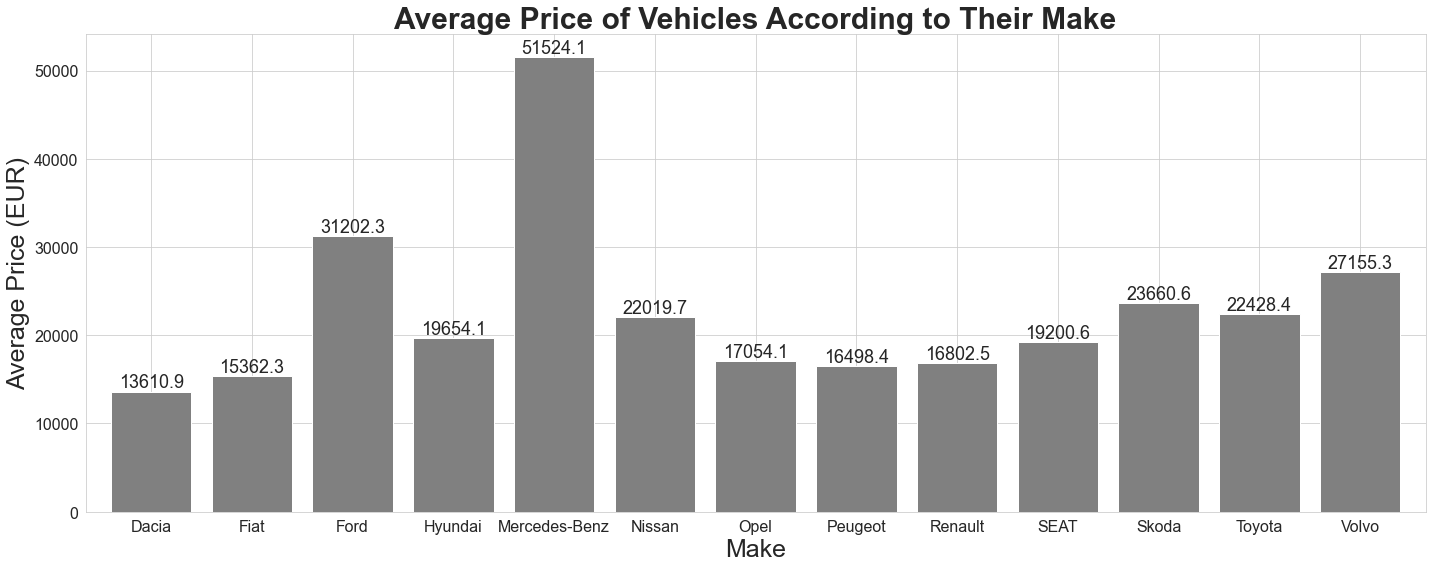

In [66]:

ax = avg_price_make.plot.bar(figsize=(20, 8), fontsize=16, width=0.8, rot=0, color="grey")

for text in ax.containers:
    ax.bar_label(text, fontsize=18, rotation=0)

ax.set_xlabel("Make", fontsize=25)
ax.set_ylabel("Average Price (EUR)", fontsize=25)
ax.set_title("Average Price of Vehicles According to Their Make", fontsize=30, fontweight="bold")

plt.tight_layout()
plt.show()

### 5. Let's check ``PARETO Rule`` in number of vehicles for sale by their make models

The Pareto rule, also known as the 80/20 rule, is a principle named after Italian economist Vilfredo Pareto. The rule states that roughly 80% of effects come from 20% of causes. In other words, for many events or phenomena, roughly 80% of the outcomes come from 20% of the inputs or factors.

The Pareto rule is often used in business and economics to help prioritize efforts and resources. For example, a company may find that 80% of its revenue comes from 20% of its customers, so it may decide to focus its sales and marketing efforts on those customers. Similarly, in project management, the Pareto rule can be used to identify the 20% of tasks that are most critical to the success of a project, and focus resources on completing those tasks first.

In [67]:
num_sale = df.make_model.value_counts()
num_sale

Renault Megane              848
SEAT Leon                   746
Opel Astra                  669
Hyundai i30                 578
Ford Mustang                561
                           ... 
Mercedes-Benz CLK 63 AMG      1
Renault Master                1
Mercedes-Benz SL 560          1
Renault Express               1
Mercedes-Benz Vito            1
Name: make_model, Length: 553, dtype: int64

In [68]:
num_sale_df = pd.DataFrame(num_sale).rename(columns={"make_model": "num_of_sales"})
num_sale_df

,num_of_sales
Renault Megane,848
SEAT Leon,746
Opel Astra,669
Hyundai i30,578
Ford Mustang,561
...,...
Mercedes-Benz CLK 63 AMG,1
Renault Master,1
Mercedes-Benz SL 560,1
Renault Express,1


In [69]:
num_sale /= num_sale.sum()/100
category_classes = pd.qcut(num_sale, q=[0, .20, .80, 1], labels=["Bottom 20%", "Mid 60%", "Top 20%"])
groups = num_sale.groupby(category_classes).sum().sort_values(ascending=False)

In [70]:
print(groups)
print(category_classes)

make_model
Top 20%      83.021
Mid 60%      16.099
Bottom 20%    0.879
Name: make_model, dtype: float64
Renault Megane                 Top 20%
SEAT Leon                      Top 20%
Opel Astra                     Top 20%
Hyundai i30                    Top 20%
Ford Mustang                   Top 20%
                               ...    
Mercedes-Benz CLK 63 AMG    Bottom 20%
Renault Master              Bottom 20%
Mercedes-Benz SL 560        Bottom 20%
Renault Express             Bottom 20%
Mercedes-Benz Vito          Bottom 20%
Name: make_model, Length: 553, dtype: category
Categories (3, object): ['Bottom 20%' < 'Mid 60%' < 'Top 20%']


In [73]:
PARETO_category = pd.DataFrame(category_classes).rename(columns={"make_model": "PARETO_category"})
PARETO_category

,PARETO_category
Renault Megane,Top 20%
SEAT Leon,Top 20%
Opel Astra,Top 20%
Hyundai i30,Top 20%
Ford Mustang,Top 20%
...,...
Mercedes-Benz CLK 63 AMG,Bottom 20%
Renault Master,Bottom 20%
Mercedes-Benz SL 560,Bottom 20%
Renault Express,Bottom 20%


In [76]:
PARETO_Rule = pd.concat([num_sale_df, PARETO_category], axis=1)
PARETO_Rule

,num_of_sales,PARETO_category
Renault Megane,848,Top 20%
SEAT Leon,746,Top 20%
Opel Astra,669,Top 20%
Hyundai i30,578,Top 20%
Ford Mustang,561,Top 20%
...,...,...
Mercedes-Benz CLK 63 AMG,1,Bottom 20%
Renault Master,1,Bottom 20%
Mercedes-Benz SL 560,1,Bottom 20%
Renault Express,1,Bottom 20%


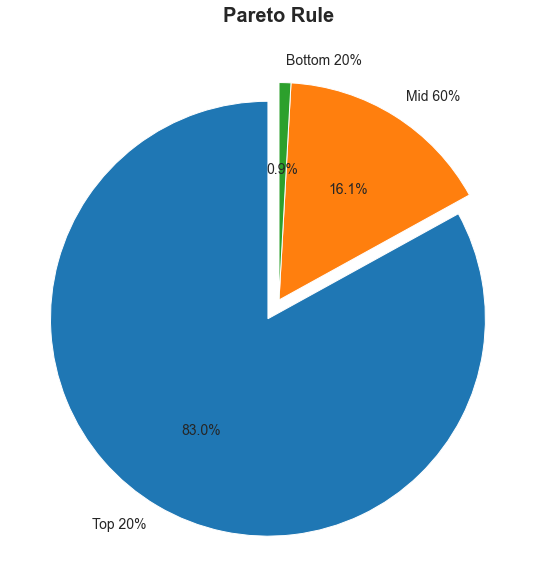

In [86]:
groups.plot.pie(figsize=(10, 10), autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0), textprops={'fontsize': 14})
plt.title("Pareto Rule", fontsize=20, fontweight="bold")
plt.ylabel("")
plt.show()

### 6. Which make produce ``lowest carbon dioxide emission`` cars? (Excluding electric vehicles)

In [99]:
df

,make_model,make,model,price,body_type,type,warranty,mileage,gearbox,fuel_type,...,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,power_kW,power_hp,fuel_consumption_avg,age,country,multimedia
0,Mercedes-Benz A 160,Mercedes-Benz,A 160,16950.000,Compact,Used,Available,120200.000,Manual,Diesel,...,No,Cloth,2.000,efficient,75.000,102.000,3.800,6.000,Spain,No
1,Mercedes-Benz EQE 350,Mercedes-Benz,EQE 350,80900.000,Compact,Pre-registered,Available,5000.000,Automatic,Electric,...,No,Part/Full Leather,0.000,efficient,215.000,292.000,5.300,0.000,Spain,Yes
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,69900.000,Compact,Used,Available,18900.000,Automatic,Benzine,...,No,Part/Full Leather,2.000,unefficient,310.000,421.000,8.400,2.000,Spain,No
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,A 35 AMG,46990.000,Compact,Used,Available,18995.000,Automatic,Benzine,...,No,Part/Full Leather,2.000,unefficient,225.000,306.000,7.300,2.000,Mexico,No
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,16800.000,Compact,Used,Available,197000.000,Automatic,Diesel,...,No,Part/Full Leather,2.000,unefficient,100.000,136.000,4.900,7.000,Spain,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24555,Volvo S90,Volvo,S90,37600.000,Sedan,Used,Available,40345.000,Automatic,Electric,...,No,Part/Full Leather,2.000,efficient,288.000,392.000,2.000,3.000,Spain,No
24556,Volvo S40,Volvo,S40,5499.000,Sedan,Used,Available,145000.000,Automatic,Benzine,...,No,Cloth,3.000,efficient,125.000,170.000,9.100,18.000,Netherlands,No
24557,Volvo C30,Volvo,C30,7300.000,Sedan,Used,No Warranty,96000.000,Manual,Diesel,...,No,Cloth,1.000,unefficient,84.000,114.000,3.800,11.000,Belgium,No
24558,Volvo S90,Volvo,S90,29900.000,Sedan,Used,Available,94343.000,Automatic,Benzine,...,No,Part/Full Leather,1.000,efficient,187.000,254.000,6.500,5.000,Netherlands,Yes


In [107]:
df1 = df.copy()
df1.sample(3).T

,3294,7700,11861
make_model,Opel Astra,Peugeot 407,SEAT Arona
make,Opel,Peugeot,SEAT
model,Astra,407,Arona
price,8990.000,6998.000,16960.000
body_type,Coupe,Coupe,Off-Road/Pick-up
type,Used,Used,Used
warranty,No Warranty,No Warranty,No Warranty
mileage,134000.000,139980.000,12885.000
gearbox,Manual,Automatic,Manual
fuel_type,Benzine,Benzine,Liquid/Natural Gas


In [110]:
electric_vehicles = df1[df1["fuel_type"] == "Electric"].index

In [111]:
df1.drop(electric_vehicles, inplace=True)

In [112]:
df1.groupby(["make"]).co_emissions.mean()

make
Dacia           119.225
Fiat            127.869
Ford            162.969
Hyundai         132.484
Mercedes-Benz   166.517
Nissan          158.158
Opel            127.716
Peugeot         129.094
Renault         129.116
SEAT            116.247
Skoda           116.982
Toyota          132.508
Volvo           144.546
Name: co_emissions, dtype: float64

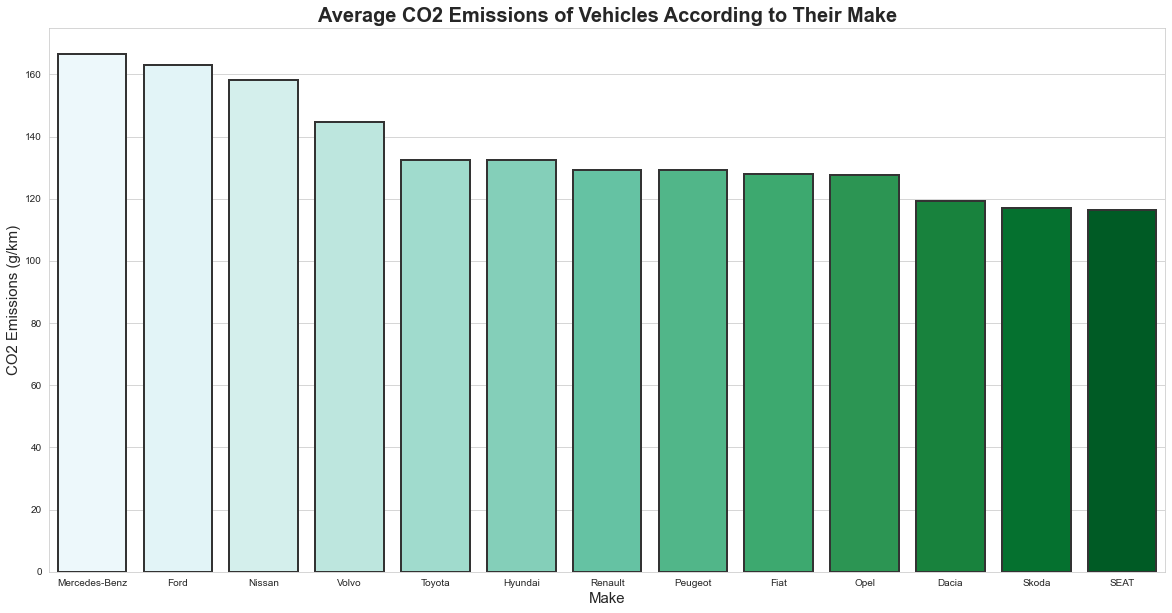

In [121]:
sns.barplot(x=df1.make, y=df1.co_emissions, ci=None, palette="BuGn", capsize=0.2, errcolor=".2", 
            errwidth=2, linewidth=2, saturation=1, edgecolor=".2", 
            order=df1.groupby(["make"]).co_emissions.mean().sort_values(ascending=False).index)
plt.title("Average CO2 Emissions of Vehicles According to Their Make", fontsize=20, fontweight="bold")
plt.xlabel("Make", fontsize=15)
plt.ylabel("CO2 Emissions (g/km)", fontsize=15)
plt.show()

### 7. What are the ``top 10 most popular`` cars in our dataset?

In [125]:
df.make_model.value_counts().head(10) 

Renault Megane    848
SEAT Leon         746
Opel Astra        669
Hyundai i30       578
Ford Mustang      561
Dacia Sandero     526
Peugeot 308       516
Ford Focus        485
Nissan Qashqai    446
SEAT Ibiza        434
Name: make_model, dtype: int64

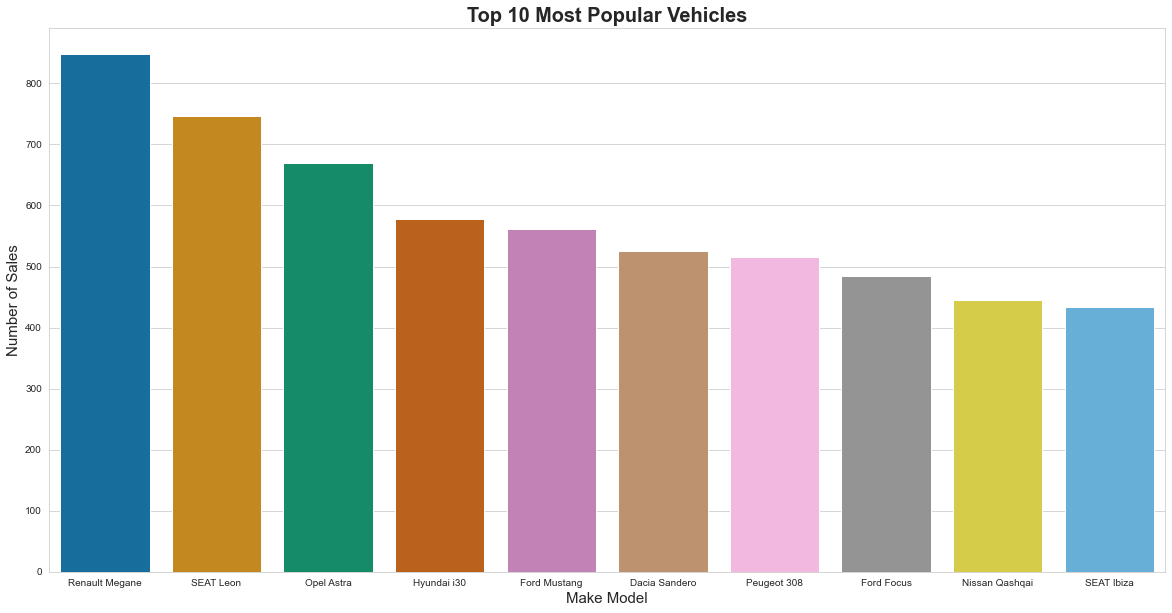

In [136]:
sns.countplot(x=df.make_model, order=df.make_model.value_counts().iloc[:10].index, palette="colorblind")
plt.title("Top 10 Most Popular Vehicles", fontsize=20, fontweight="bold")
plt.xlabel("Make Model", fontsize=15)
plt.ylabel("Number of Sales", fontsize=15)
plt.show()

### 8. What are the ``average``, ``minimum`` and ``maximum`` selling ``prices`` of vehicles by ``body_type``?

In [139]:
min_max_avg_price = df.groupby(['body_type']).agg({'price': ['max', 'min', 'mean']}).sort_values(by=('price', 'max'), ascending=False)
min_max_avg_price

price                   
                           max      min      mean
body_type                                        
 Coupe             1346900.000  490.000 28712.650
 Off-Road/Pick-up   375900.000 2950.000 29436.341
 Convertible        283900.000  500.000 20478.867
 Compact            184900.000  790.000 15895.482
 Sedan              179900.000  999.000 22783.330
 Station wagon      177879.000  750.000 22675.341

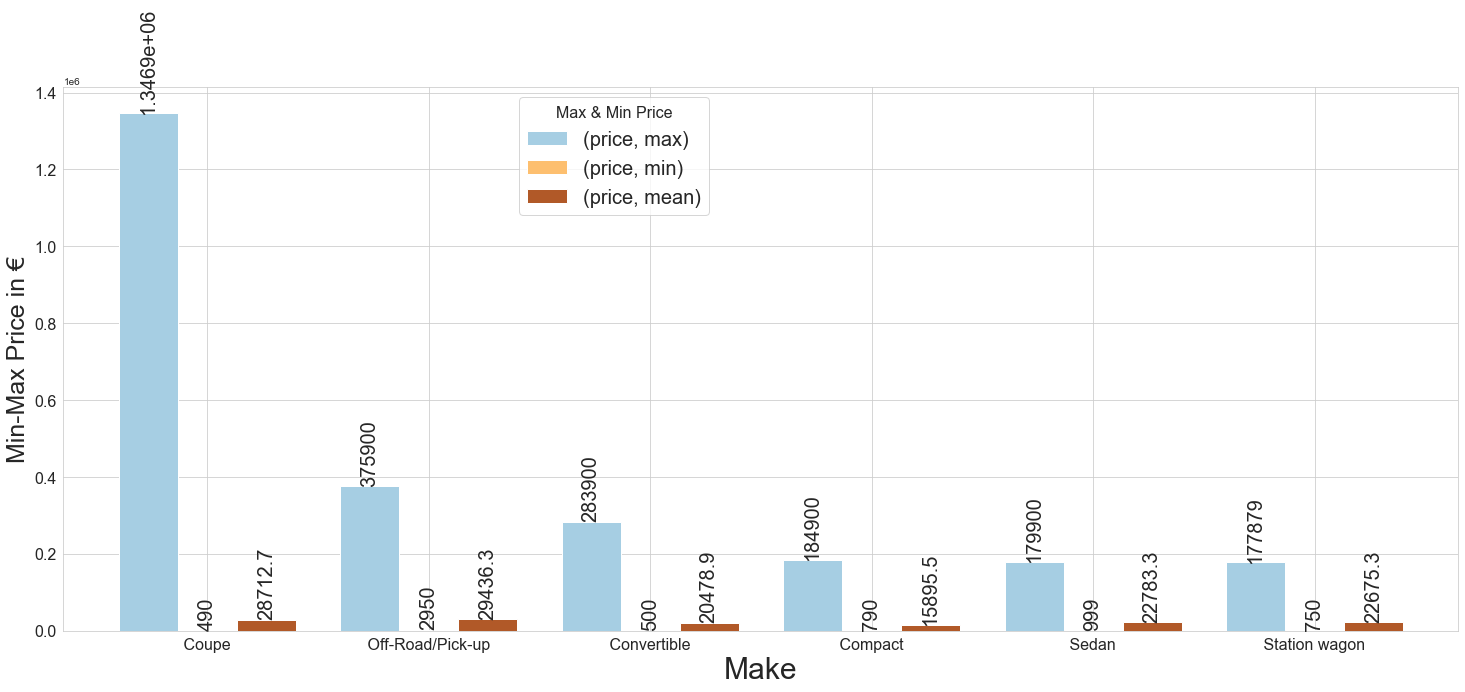

In [143]:
ax = min_max_avg_price.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=0, colormap='Paired')

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Make', fontsize=30)
ax.set_ylabel('Min-Max Price in €', fontsize=25)

plt.legend(title="Max & Min Price", title_fontsize=16, prop={'size': 20}, bbox_to_anchor=(0.47, 1))
# plt.title("Min-Max Price of Vehicles According to Their Body Type", fontsize=30, fontweight="bold")
plt.show()

### 9. What is the ``make_model`` of the vehicles whose sales ``price`` is ``between 59000 and 60000`` in € (inclusive)?

In [144]:
df[(df.price >= 59000) & (df.price <= 60000)]["make_model"].unique()

array(['Mercedes-Benz A 35 AMG', 'Mercedes-Benz C 43 AMG',
       'Mercedes-Benz C 400', 'Mercedes-Benz E 220',
       'Mercedes-Benz E 300', 'Mercedes-Benz E 400',
       'Mercedes-Benz SL 500', 'Mercedes-Benz E 53 AMG',
       'Mercedes-Benz GLE 300', 'Mercedes-Benz GLC 300',
       'Mercedes-Benz GLA 45 AMG', 'Mercedes-Benz C 63 AMG',
       'Mercedes-Benz C 220', 'Mercedes-Benz S 450',
       'Mercedes-Benz A 45 AMG', 'Mercedes-Benz S 350',
       'Mercedes-Benz S 400', 'Mercedes-Benz S 63 AMG', 'Opel Movano',
       'Renault Alpine A110', 'Renault Spider', 'Renault Clio',
       'Peugeot Traveller', 'Peugeot 508', 'Toyota Supra',
       'Toyota Highlander', 'Toyota RAV 4', 'Toyota Proace',
       'Nissan GT-R', 'Nissan Skyline', 'Ford Mustang', 'Ford Ranger',
       'Hyundai IONIQ 5', 'Volvo XC90', 'Volvo XC60', 'Volvo V60',
       'Volvo V90', 'Volvo S60', 'Volvo S90'], dtype=object)

### 10. What is the most common ``gearbox`` type among the vehicles for sale whose ``make & model`` is ``Volvo S90`` and ``body`` is ``Sedan``?

In [150]:
df[(df["make_model"] == "Volvo S90") & (df["body_type"] == "Sedan")]

,make_model,make,model,price,body_type,type,warranty,mileage,gearbox,fuel_type,...,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,power_kW,power_hp,fuel_consumption_avg,age,country,multimedia


In [162]:
df.body_type.value_counts()

 Off-Road/Pick-up     4844
 Sedan                4701
 Station wagon        4649
 Compact              4396
 Coupe                3315
 Convertible          2655
Name: body_type, dtype: int64

In [163]:
df.body_type = df.body_type.str.strip()

In [166]:
df[(df["make_model"] == "Volvo S90") & (df["body_type"] == "Sedan")].gearbox.value_counts()

Automatic    107
Manual         1
Name: gearbox, dtype: int64

In [ ]:
# Answer: Automatic